In [1]:
#import libraries
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import *
import scipy as sp
from astropy.io import fits

Text(0.5, 1.0, 'Blackbody Spectrum')

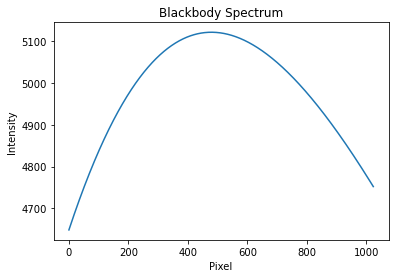

In [2]:
#plot blackbody data
bb_data = np.genfromtxt('Group_J_BB.dat')
plt.plot(bb_data)
plt.ylabel("Intensity")
plt.xlabel("Pixel")
plt.title("Blackbody Spectrum")

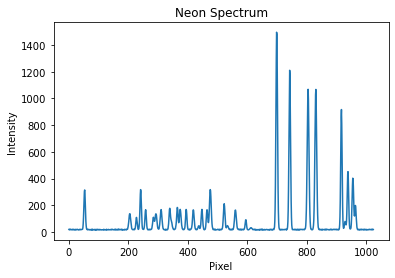

In [3]:
#plot neon data
Ne_data = np.genfromtxt('Ne_calib.dat')
plt.ylabel("Intensity")
plt.xlabel("Pixel")
plt.title("Neon Spectrum")

plt.plot(Ne_data)

In [4]:
###### create array for wavelengths
wavelengths = np.zeros(9)

#store wavelenghts
wavelengths[0] = 692.947
wavelengths[1] = 703.241
wavelengths[2] = 717.394
wavelengths[3] = 724.512
wavelengths[4] = 743.840
wavelengths[5] = 747.244
wavelengths[6] = 748.887
wavelengths[7] = 753.577
wavelengths[8] = 754.404

#create array for centroids
centroids = np.zeros(9)

#store centroids
centroids[0] = 700
centroids[1] = 747
centroids[2] = 810
centroids[3] = 830
centroids[4] = 920
centroids[5] = 935
centroids[6] = 945
centroids[7] = 960
centroids[8] = 970

In [23]:
#calculate means
mean_x = np.mean(centroids)
mean_y = np.mean(wavelengths)

#define varibales
num = 0
denom = 0

#perform calculations for linear regression method
for i in range(centroids.size):
    num += (centroids[i]-mean_x)*(wavelengths[i]-mean_y)
    denom += (centroids[i]-mean_x)**2

m = num/denom
c = mean_y-(m*mean_x)

min_x = np.min(centroids) - 25
max_x = np.max(centroids)+ 25

x = np.linspace(min_x, max_x, 1000)
y = m*x + c

0.7525894910729193


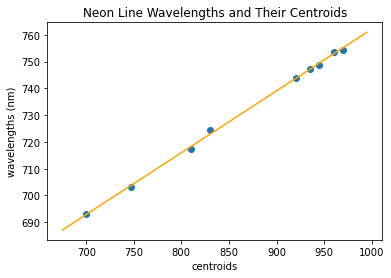

In [24]:
#plot centroids against wavelenghts
plt.scatter(centroids, wavelengths)
plt.xlabel("centroids")
plt.ylabel("wavelengths (nm)")
plt.title("Neon Line Wavelengths and Their Centroids")

#define a linear fit function
def linear(m, x, b):
    return (m*x+b)

#store optimal and error parameters
p_opt, p_cov = curve_fit(linear, centroids, wavelengths, p0 = (0,0), absolute_sigma = True)
m_opt = p_opt[0]
b_opt = p_opt[1]

#Plot line of best fit
plt.plot(x, y, color = "orange")

#calculate the rms error
rms_err = 0
for i in range(centroids.size):
    y_pred = m*centroids[i] + c
    rms_err += (wavelengths[i] - y_pred)**2

rms_err = np.sqrt(rms_err/centroids.size)
print(rms_err)

In [12]:
#store the wavelength solution
solution = m_opt

#calculate temperature
temperature = (2.8977685**6)/solution

#calculate the wavelength solution error
solution_err = np.sqrt(p_cov[0,0])

#calculate the temperature error
temp_err = temperature*(solution_err/solution)
print("The temperature is", temperature, "+/-",np.round(temp_err, decimals = 1), "Kelvin")

The temperature is 2565.9678080223302 +/- 39.4 Kelvin


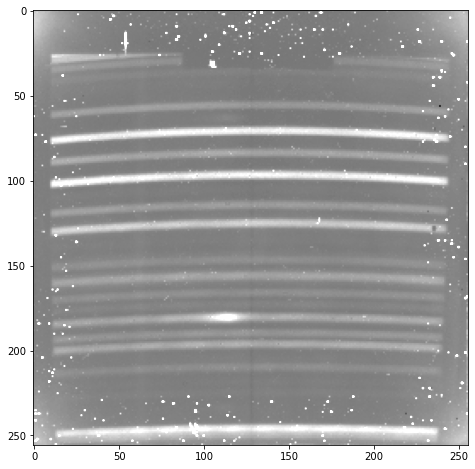

In [7]:
#open the fits file
near_inf = fits.open('Near-Infrared.fits')
header = near_inf[0].header

data = near_inf[0].data
data.shape
plt.figure(figsize=(8, 8))
plt.imshow(data.squeeze(), vmax=np.percentile(data, 99), cmap="gray")
plt.show()

1.0621854504313604


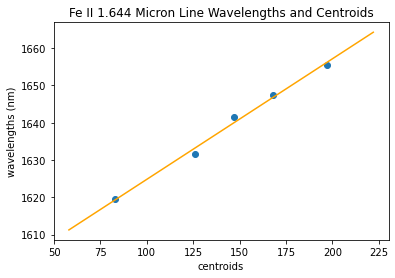

In [25]:
#store wavelengths
wavelengths2 = np.zeros(5)
wavelengths2[0] = 16194.615
wavelengths2[1] = 16317.161
wavelengths2[2] = 16414.737
wavelengths2[3] = 16475.648
wavelengths2[4] = 16553.814

#convert to nm
wavelengths2 = wavelengths2/10

#store centroids
centroids2 = np.zeros(5)
centroids2[0] = 83
centroids2[1] = 126
centroids2[2] = 147
centroids2[3] = 168
centroids2[4] = 197

#plot centroids against wavelengths
plt.scatter(centroids2, wavelengths2)
plt.xlabel("centroids")
plt.ylabel("wavelengths (nm)")
plt.title("Fe II 1.644 Micron Line Wavelengths and Centroids")

#store optimal and error parameters
p_opt2, p_cov2 = curve_fit(linear, centroids2, wavelengths2, p0 = (0,0), absolute_sigma = True)
m_opt2 = p_opt2[0]
b_opt2 = p_opt2[1]

#calculate means
mean_x2 = np.mean(centroids2)
mean_y2 = np.mean(wavelengths2)

#define variables
num2 = 0
denom2 = 0

#perform calculations for line of best fit method
for i in range(centroids2.size):
    num2 += (centroids2[i]-mean_x2)*(wavelengths2[i]-mean_y2)
    denom2 += (centroids2[i]-mean_x2)**2

m2 = num2/denom2
c2 = mean_y2-(m2*mean_x2)

min_x2 = np.min(centroids2) - 25
max_x2 = np.max(centroids2)+ 25

x2 = np.linspace(min_x2, max_x2, 1000)
y2 = m2*x2 + c2

#plot line of best fit
plt.plot(x2,y2, color="orange")

#calculate rms error
rms_err2 = 0
for i in range(centroids2.size):
    y_pred2 = m2*centroids2[i] + c2
    rms_err2 += (wavelengths2[i] - y_pred2)**2

rms_err2 = np.sqrt(rms_err2/centroids2.size)
print(rms_err2)

In [16]:
#store the error in the slope
m_variance = p_cov2[0,0]

#calculate the error in the wavelength solution
err = np.sqrt(m_variance)

print("The solution is", m_opt2,"+/-",np.round(err, decimals = 2), "nm")

The solution is 0.32317440971442746 +/- 0.01 nm


In [28]:
#store values
c = 3*10**8
lamda = 1.6439981*10**-6
delta_lamda = 0.3231744*10**-9

#calculate velocity of gas
v = c*(delta_lamda/lamda)

#calculate error in the velocity
lamda_err = (delta_lamda/lamda)*((0.01*10**-9)/delta_lamda)
v_err = v*lamda_err/((0.01*10**-9)/delta_lamda)

print("The velocity of the gas is", v, "+/-",np.round(v_err, decimals = 0), "m/s")

The velocity of the gas is 58973.498813654354 +/- 12.0 m/s
